In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math
import sys

sys.path.extend(['/home/jordan/Documents/Science/CircuitTheory/'])
from Components.inductor import Inductor
from Components.capacitor import Capacitor
from Components.resistor import Resistor

# Table of Contents
1. [Filters](#Filters)
2. [Low Pass](#Low-Pass-Filters)
    1. [Inductive](#Inductive-Filters)
    2. [Capacitive](#Capacitive-Filters)
3. [High Pass](#High-Pass-Filters)
    1. [Capacitive](#Capacitive)
    2. [Inductive](#Inductive-Filter)

# Filters
It is sometimes desirable to have circuits capable of selectively filtering one frequency or range of frequencies out of a mix of different frequencies in a circuit. A circuit designed to perform this frequency selection is called a filter circuit, or simply a filter.

# Low Pass Filters
A low pass filter filters out voltage signals with higher frequencies by causing a higher amount of voltage to drop across the other components while allowing lower frequency voltage signals to "pass through" with less impedance.  

## Inductive Filters
One type of low pass filter is an inductor in series with the load.  Via the notion that the reactance of an inductor, denoted as '$X_L$', with an inductance of $L$ is proportional to the frequency of the voltage signal, the reactance, and therefore impedance, goes up as the frequency goes up, which means that the voltage dropped accross the inductor, or inductive filter, goes up with the frequency as well, since the voltage running accross the inductor, denoted as '$V_L$', is proportional to the impedance of the inductor, denoted as '$Z_L$'.  Ultimately, this leaves less voltage to drop across the load when the frequency is relatively high.
$$ X_L = 2\pi f L$$
$$ Z_L = X_L\angle90^{\circ}$$
$$ V_L = Z_LI$$

### Example

Suppose we have a circuit with a $3$H inductor ($L_1$) in series with the $1\text{k}\Omega$ load ($R_\text{load}:=R_L$) and a $1\text{V}\angle0$ AC power supply.  
![inductive filter](https://www.allaboutcircuits.com/uploads/articles/inductive-low-pass-filter-circuit.png)  
The reactance of $L_1$ is given by:
$$ X_L = 6\pi f \text{H}$$
$$ Z_L = X_L\angle90^{\circ}$$
The voltage running accross the inductor and the load is:
$$ V_L = Z_LI$$
$$ V_R = 1\text{k}\Omega \cdot I$$
Via KVL, we can find the current.
$$ 1\text{V}\angle0 = V_L + V_R = (Z_L+1000\Omega)I$$
$$ I = \frac{1\text{V}\angle0}{Z_L+1000\Omega}$$
The complex number representation of the denominator of the above fraction, denoted as '$\mathbf{D}$', in rectangular form is:
$$\mathbf{D}= Z_L+1000\Omega = 1000\Omega + j\cdot X_L$$
And, in polar form:
$$ |\mathbf{D}| = \sqrt{X_L^2+10^6\Omega^2} $$
$$ D_\theta = \arcsin \frac{X_L}{1000\Omega}$$
$$ \mathbf{D} = |\mathbf{D}|\angle D_\theta$$
The amplitude of the current is thus:
$$ |I|=\frac{1}{|\mathbf{D}|} = \frac{1}{\sqrt{36\pi^2f^2\text{H}^2 + 10^6\Omega^2}}$$
Via the above in conjunction with Ohm's Law, the amplitude of the voltage running accross the load is:
$$ |V_R|:=|V_R|(f) = \frac{1000\Omega}{\sqrt{36\pi^2f^2\text{H}^2 + 10^6\Omega^2}} $$

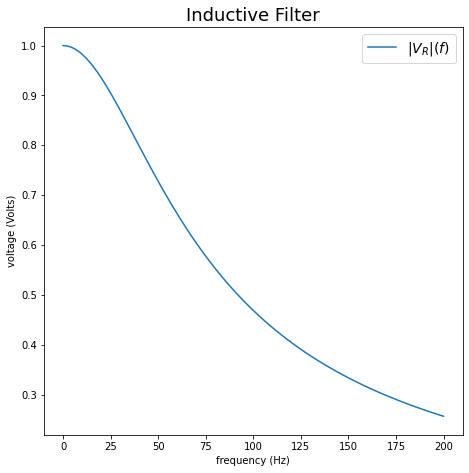

In [7]:
f = np.linspace(0, 200, num=200)
magV_R = 1000/np.sqrt(36*np.pi**2*f**2 + 10**6)

fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.set_title('Inductive Filter', size=18)
ax.set_xlabel('frequency (Hz)')
ax.set_ylabel('voltage (Volts)')
ax.plot(f, magV_R, label=r'$|V_R|(f)$')
ax.legend(fontsize=14)

### Generalized Equations

The above can be generalized by assuming an inductance of $L_1=L$, a load with a resistance of $R_L$, and an AC power supply of $E = |E|\angle0$. 
$$ X_L = 2\pi f L$$
$$ E = Z_LI + R_LI = I(Z_L+R_L)$$
$$ I = \frac{E}{Z_L+R_L}$$
The complex number represention of the denominator, denoted as '$\mathbf{D}$', in polar form is:
$$ \mathbf{D} = |\mathbf{D}|\angle D_\theta$$
$$ D_\theta = \arcsin \frac{X_L}{R_L}$$
$$ |\mathbf{D}| = \sqrt{X_L^2 + R_L^2}$$
The amplitude of the current is thus:
$$ |I| = \frac{|E|}{|\mathbf{D}|}$$
Via Ohm's Law, the voltage running accross the load is given by:
$$ V_{RL} = R_LI$$
And the amplitude of said voltage is given by:
$$ |V_{RL}|:=|V_{RL}|(f) = R_L|I| = R_L\frac{|E|}{\sqrt{4\pi^2f^2L^2 + R_L^2}}$$

## Capacitive Filters
A resistor in series with a parallel circuit consisting of a capacitor in parallel with a resistive load is another way of forming a low pass filter.  As the frequency goes up the reactance and therefore the voltage running accross the capacitor goes down;  And, since the voltage running accross the load is equal to that of the capacitor it is in parallel with, the voltage running accross the load goes down with the capacitor as the frequency goes up.  Conversely, the voltage running accross the capacitor and thus the load goes up as the frequency goes down.  This fits the concept of low pass filtration.  

Via KVL, the voltage dropped across the resistor that is in series with the parallel circuit goes up as the frequency goes up and vice versa.

### Example

Suppose there is a circuit defined by '$E--R_1--C_1//R_L$', where
* $E=1\text{V}\angle0$
* $R_1 = 500\Omega$
* $C_1= 7\mu\text{F}=7\cdot10^{-6}\text{F}$
* $R_L:=R_\text{load}=1000\Omega$
![capacitive filter](https://www.allaboutcircuits.com/uploads/articles/capacitive-low-pass-filter-circuit.png)
The impedance of $R_1$ is of course:
$$ Z_1 = X_1\angle0 = R_1\angle0$$
The impedance of $C_1//R_L$, denoted as '$Z_2$', is given by:
$$Z_2 = \frac{1}{D}$$
where
$$ D = \frac{1}{Z_{C1}} + \frac{1}{Z_{RL}}$$
$$ Z_{RL} = R_L\angle0 = R_L$$
$$ Z_{C1} = X_{C1}\angle-90^{\circ} = - j \cdot X_{C1}$$
$$ X_{C1} = \frac{1}{14\pi f \mu\text{F}}$$
$$ D = \frac{1}{X_{C1}}\angle90^{\circ} + \frac{1}{R_L}\angle0 = \frac{1}{R_L} + j \cdot \frac{1}{X_{C1}}$$
The denominator, denoted as '$D$', in polar form is given by:
$$ D = |D|\angle D_\theta$$
$$ D_\theta = \arcsin \frac{1}{X_{C1}|D|} = \arccos \frac{1}{R_L|D|}$$
$$ |D| = \sqrt{\frac{1}{R_L^2} + \frac{1}{X_{C1}^2}}$$
Via KVL,
$$ E = Z_1I + Z_2I = (Z_1+Z_2)I$$
$$ I = \frac{E}{Z_1+Z_2}$$
Let $Z_T$ be defined as:
$$ Z_T:=Z_1+Z_2 = R_1\angle0 + \frac{1}{|D|}\angle-D_\theta$$
The rectangular form of $Z_2$ is given by:
$$ Z_2=\frac{1}{|D|}(\cos -D_\theta + j \cdot \sin-D_\theta) = \frac{1}{|D|}(\cos D\theta - j \cdot \sin D_\theta)$$
$$ Z_2 = \frac{1}{|D|}\left(\frac{1}{R_L|D|}  - j \cdot \frac{1}{X_{C1}|D|} \right)$$
Thus $Z_T$ is given by:
$$ Z_T = R_1 + \frac{1}{R_L|D|^2} - j \cdot \frac{1}{X_{C1}|D|^2}$$

$$Z_T = \frac{R_1R_L|D|^2 + 1}{R_L|D|^2} - j \cdot \frac{1}{X_{C1}|D|} $$

The polar form of $Z_T$ is given by:
$$ Z_T = |Z_T|\angle Z_{T\theta}$$
$$ |Z_T| = \frac{1}{|D|}\sqrt{\frac{(R_1R_L|D|^2+1)^2}{R_L^2|D|^2} + \frac{1}{X_{C1}^2}}$$
$$ Z_{T\theta} = \arcsin - \frac{1}{X_{C1}|D||Z_T|} $$
The total current is given by:
$$ I_T:=I=\frac{|E|}{|Z_T|}\angle-Z_{T\theta} = \frac{|E|}{|Z_T|}\angle \arcsin \frac{1}{X_{C1}|D||Z_T|} $$

The voltage running accross the capacitor and the load is given by:
$$ V_{C1} = Z_{C1}I_1$$
$$ V_{RL} = Z_{RL}I_2$$
where $I_T=I=I_1+I_2$.
$$ V_{C1}=V_{RL}$$
Via the above three equations and equivalance principle,
$$ Z_{C1}I_1 = Z_{RL}(I-I_1)$$

$$ Z_{C1}I_1 + Z_{RL}I_1 = Z_{RL}I$$
$$ I_1 = \frac{Z_{RL}I}{Z_{C1}+Z_{RL}}$$

The voltage running accross the load is also given by:
$$ E - V_{R1} = V_{C1}=V_{RL} = E - Z_1I = E - R_1 \frac{|E|}{|Z_T|}\angle-Z_{T\theta}$$

In rectangular form:
$$ V_{RL} = |E| - R_1\frac{|E|}{|Z_T|}(\cos Z_{T\theta} - j \cdot \sin Z_{T\theta})$$

$$V_{RL} = |E| - R_1\frac{|E|}{|Z_T|^2}(Z_{Tx} - j \cdot Z_{Ty}) $$

### Generalized Equation
$$|V_{RL}|:=|V_{RL}|(f \vert |E|, R_1, C, R_L) = \sqrt{\left( |E| - R_1\frac{|E|Z_{Tx}}{|Z_T|^2}\right)^2 + \left(R_1\frac{|E|Z_{Ty}}{|Z_T|^2} \right)^2}$$

In [17]:
def X_C_gen(C):
    return lambda f: 1/(2*np.pi*f*C)

def _mag_D_gen(C, R_L):
    X_C = X_C_gen(C)
    return lambda f: np.sqrt(1/(R_L**2) + 1/(X_C(f)**2))

def Z_Tx_gen(R_1, C, R_L):
    """The x-component or real part of the complex number representation of the total impedance."""
    mag_D = _mag_D_gen(C, R_L)
    return lambda f: (R_1*R_L*mag_D(f)**2 + 1)/(R_L*mag_D(f)**2)

def Z_Ty_gen(R_1, C, R_L):
    """The y-component or imaginary part of the complex number representation of the total impedance."""
    mag_D = _mag_D_gen(C, R_L)
    X_C = X_C_gen(C)
    return lambda f: - 1/(mag_D(f)*X_C(f))

def magZ_T_gen(R_1, C, R_L):
    """Magnitude (amplitude) of the total impedance of the capacitive low pass filter circuit."""
    Z_Tx = Z_Tx_gen(R_1, C, R_L)
    Z_Ty = Z_Ty_gen(R_1, C, R_L)
    return lambda f: np.sqrt(Z_Tx(f)**2 + Z_Ty(f)**2) 

def magV_RL_gen(E, R_1, C, R_L):
    """The magnitude of the voltage drop across the load with a resistance of R_L ohms.  This is a lambda 
    (parametric) function that returns a specific function with one variable, the frequency, denoted as 
    'f'.  The parameters are:
    E:   Amplitude of the voltage provided by the AC power supply;
    R_1: Resistance of the resistor in series with the parallel circuit;
    C:   Capacitance of the capacitor that is in parallel with the load;
    R_L: Resistance of the load """
    Z_Tx = Z_Tx_gen(R_1, C, R_L)
    Z_Ty = Z_Ty_gen(R_1, C, R_L)
    return lambda f: np.sqrt((E - R_1*E*Z_Tx(f)/(Z_Tx(f)**2+Z_Ty(f)**2))**2 + (R_1*E*Z_Ty(f)/(Z_Tx(f)**2+Z_Ty(f)**2))**2)

In [ ]:
class CapacitiveLowPass:
    
    def __init__(self, capacitor: Capacitor, R_1: float, R_L: float, magE: float):
        self.c = self.capacitor = capacitor
        self.R_1 = R_1; self.resistor = Resistor(R_1)
        self.R_L = R_L; self.load = Resistor(R_L)
        self.magE = magE; self.E = complex(magE, 0)
        
    def _D(self, f: float):
        return complex(1/self.R_L, 1/self.c.X(f))
    
    def _mag_D(self, f: float):
        D = self._D(f)
        return np.sqrt(D.real**2 + D.imag**2)

Below is some code to generate the bode plot given by the parametric function above with the values found in our latest example of a capacitive filter as arguments.

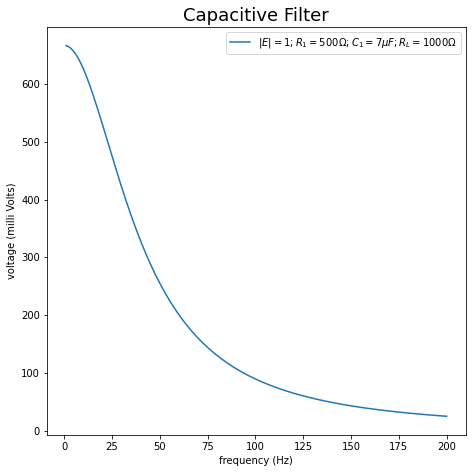

In [18]:
f = np.linspace(1, 200, num=200)
magV_RL = magV_RL_gen(1, 500, 7e-6, 1000)
Y = np.array(list(map(magV_RL, f)))

fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.set_title('Capacitive Filter', size=18)
ax.set_xlabel('frequency (Hz)')
ax.set_ylabel('voltage (milli Volts)')
ax.plot(f, Y*1000, label=r'$|E|=1; R_1=500\Omega; C_1=7\mu F; R_L=1000\Omega$')
ax.legend()

# High Pass Filters

A high-pass filter’s task is just the opposite of a low-pass filter: to offer easy passage of a high-frequency signal and difficult passage to a low-frequency signal.  Unsuprisingly, the design of a capacitive high pass filter is the same as an inductive low pass filter, except with the inductor being replaced by a capacitor.  The same duality exists between an inductive high pass filter and a capacitive low pass filter;  An inductive high pass filter is the same as a capacitive low pass filter, except with the capacitor being replaced by an inductor.

## Capacitive

As was implied earlier in the parent of this subsection, a capacitive high pass filter consists of a capacitor in series with the load.  The higher the frequency, the lower the reactance and thus impedance of the capacitor, which means the higher the frequency, the lower the voltage drop will be accross the capacitor acting as a filter.

### Generalized Equation

Suppose there is a AC power supply with a voltage of $E_T = |E_T|\text{V}\angle0$ hooked up to a circuit consisting of a capacitor with a capacitance of $C$ in series with a load with a resitance of $R_\text{load}=R_L=R$.  

The voltage running accross the capacitor, henceforth '$C$', is given by:
$$ V_C = Z_C I$$
$$ Z_C = X_C \angle -90^{\circ}$$
$$ X_C = \frac{1}{2\pi f C}$$

And, of course the impedance of the load is given by:
$$ Z_R = X_R\angle0 = R \angle 0$$

Via KVL,
$$ E_T = V_C + V_{R} = Z_C I + Z_R I$$

The current, denoted as '$I$', is thus given by:
$$ I = \frac{E_T}{Z_C + Z_R}$$

The denominator (D) of the above fraction is given by:
$$ D = Z_C + Z_R = X_R - j \cdot X_C$$

To get $D$ in polar form, we use the following equations:
$$ D = |D|\angle D_\theta$$

$$ |D| = \sqrt{R^2 + X_C^2}$$

$$ D_\theta = \arcsin -\frac{X_C}{X_R}$$

Thus,
$$ I = \frac{|E_T|}{|D|}\angle -D_\theta$$

And, 
$$ |I|:=|I|(f \vert C, R_L, |E_T|) = \frac{|E_T|}{|D|}$$

Finally, via Ohm's Law, the above equation, and substitution,
$$ V_R = R_L I$$

$$ |V_R|:=|V_R|(f \vert C, R_L, |E_T|) = R_L |I|$$

In [20]:
class CapacitiveHighPass:
    
    
    def __init__(self, capacitor: Capacitor, R: float, magE: float):
        self.capacitor = capacitor
        self.R = R
        self.magE = magE
        
    def _magD(self, f: float):
        return np.sqrt(self.R**2 + self.capacitor.reactance(f)**2)
    
    def magV_R(self, f: float):
        return self.R*self.magE/self._magD(f)

In [3]:
""" Note that the relationships behind these lambda function only hold true in a capacitive high pass filter,
and thus should go into some namespace -- like a module or class-- with a name that reflects this fact."""

# TODO:  Place these function into the aforementioned appropriate namespace.


def magI_gen(C, R, E):
    return lambda f: E / np.sqrt(R**2 + 1/(2*np.pi*f*C)**2)

def magV_R_gen(C, R, E):
    magI = magI_gen(C, R, E)
    return lambda f: R * magI(f)

#### Critical Point

The x-coordinate of the critical point of the curve given by $|V_R|$ is equal to the root of $|V_R|'$.

$$ |V_R|'(CP_x)=0$$
$$ CP_x = \emptyset = \{\}$$

There is no solution to $CP_x$.  Trying to find one results in a mathematical fallacy.  This means that the curve given by $|V_R|$ has no critical point;  The amplitude of the voltage running accross the load simply goes up as the frequency goes up.  This positive relationship hold true without limitation.

### Specific Example

Suppose we have the following circuit:

![example-circuit-C](https://www.allaboutcircuits.com/uploads/articles/capacitive-high-pass-filter-circuit.png)

The amplitude of the voltage drop accross the load as a function of the frequency of $V_1$, denoted as '$f$', is given by:
$$ |V_R|(f):=|V_R|( f \vert 0.5\mu\text{F}, 1\text{k}\Omega, 1\text{V})$$

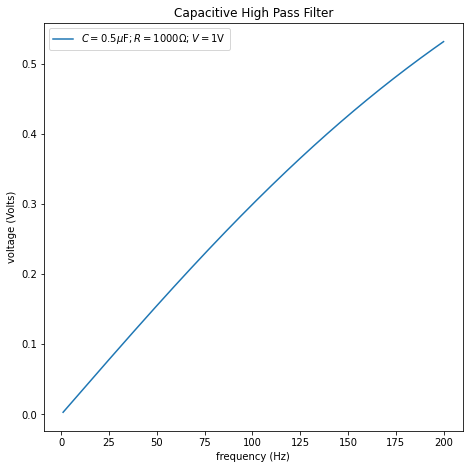

In [4]:
magV_R = magV_R_gen(0.5e-6, 1000, 1)
f = np.linspace(1, 200, num=200)

fig, ax = plt.subplots(figsize=(7.5,7.5))
ax.set(title='Capacitive High Pass Filter', xlabel='frequency (Hz)', ylabel='voltage (Volts)')
ax.plot(f, magV_R(f), label=r'$C=0.5\mu$' + 'F' + r'$; R=1000\Omega ; V=1$' + 'V')
ax.legend()

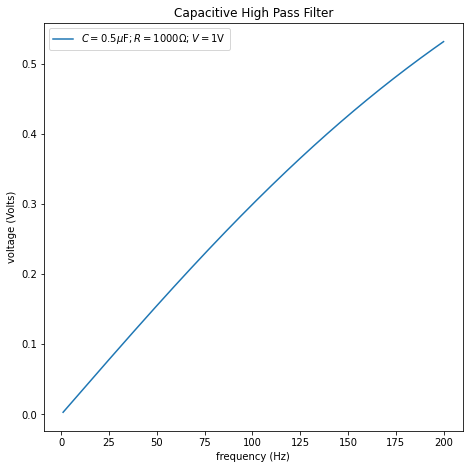

In [21]:
c = Capacitor(0.5e-6)
flt = CapacitiveHighPass(c, 1000, 1)
f = np.linspace(1, 200, num=200)


fig, ax = plt.subplots(figsize=(7.5,7.5))
ax.set(title='Capacitive High Pass Filter', xlabel='frequency (Hz)', ylabel='voltage (Volts)')
ax.plot(f, flt.magV_R(f), label=r'$C=0.5\mu$' + 'F' + r'$; R=1000\Omega ; V=1$' + 'V')
ax.legend()

## Inductive Filter

An inductive high pass filter consists of a resistor in series with a parallel circuit consisting of an inductor in parallel with the load.  The reactance of the inductor is proportional to the frequency of the voltage signal.  This relationship is a positive one and since the reactance is equal to the magnitude of the impedance of the inductor, the higher the frequency, the higher the magnitude of the impedance, allowing less voltage to drop accross the resistor that is in series with the parallel circuit, leaving more voltage for the parallel circuit and, subsequently, more for the load that is a part of it.

### Generalized Equation

Suppose there is an AC power supply ($E_T=E$) in series with a resistor ($R_1$) which is in series with a parallel circuit consisting of an inductor ($L$) in parallel with the load ($R_\text{load}=R_L$).  This circuit can be re-expressed as '$E--R_1--L//R_L$'.  

Via KVL,
$$ E = Z_1I + Z_2I$$
where,
$$ Z_1 := X_{R1}\angle0=R_1\angle0$$
and
$$ Z_2 := \frac{1}{D}$$
and
$$ D := \frac{1}{Z_L} + \frac{1}{Z_{RL}}$$

$$ Z_{RL} = X_{RL}\angle0=R_L\angle0$$

$$ Z_L = X_L\angle90^{\circ}$$

$$ X_L = 2\pi f L$$

First, let's evaluate the expression that defines $D$ by converting the terms into their rectangular form.
$$ \frac{1}{Z_L}= \frac{1}{X_L}\angle-90^{\circ} = -j\cdot \frac{1}{X_L}$$

$$ D = \frac{1}{R_L} - j \cdot \frac{1}{X_L}$$

Next, let's convert $D$ to it's polar form.

$$ D = |D|\angle D_\theta$$

$$|D| = \sqrt{\frac{1}{R_L^2} + \frac{1}{X_L^2}} $$

$$ D_\theta = \arcsin - \frac{1}{X_L|D|} = -\arcsin \frac{1}{X_L|D|}$$

In [17]:
class InductiveHighPass:
    """Inductive High Pass Filter
    A filter circuit that allows easy passage of high frequency voltage signals but not low frequency ones.  
    The circuit can be defined with the following expression: 'E--R_1--L//R_L'."""
    
    def __init__(self, inductor: Inductor, R_L: float, R_1: float, magE: float):
        self.inductor = inductor
        self.R_L = R_L
        self.R_1 = R_1
        self.magE = magE
        
    def _magD(self, f: float):
        return np.sqrt(1/self.R_L**2 + 1/self.inductor.reactance(f)**2)
    
    def _magD_T(self, f: float):
        return np.sqrt((self.R_1 + 1/(self.R_L*self._magD(f)**2))**2 + 1/(self.inductor.reactance(f)**2*self._magD(f)**4))
    
    def _magD_1(self, f: float):
        return np.sqrt(self.R_L**2 + self.inductor.reactance(f)**2)
    
    def magV_RL(self, f: float):
        """The amplitude of the voltage running accross the load as a function of the frequency, denoted as 'f',
        of input voltage signal."""
        
        return self.inductor.reactance(f)*self.R_L*self.magE/(self._magD_T(f)*self._magD_1(f))

Via the above, the definition of $Z_2$,
$$ Z_2 = \frac{1}{|D|}\angle \arcsin \frac{1}{X_L|D|}$$

Now, we can find $I$.

$$ I = \frac{E}{Z_1+Z_2}$$

$$ Z_1 + Z_2 = R_1\angle 0 + \frac{1}{|D|}\angle \arcsin \frac{1}{X_L|D|}$$

To evaluate the above expression we will convert each term into it's rectangular form.

$$Z_1 = R_1$$

$$ Z_2 = \frac{1}{|D|^2}\left( \frac{1}{R_L} + j \cdot \frac{1}{X_L} \right)$$

$$ Z_1 + Z_2 = R_1 + \frac{1}{R_L|D|^2} + j \cdot \frac{1}{X_L|D|^2}$$

Now let '$D_T$' be defined as:
$$ D_T := Z_1 + Z_2$$

$$ D_T=|D_T|\angle D_{T\theta}$$

$$ |D_T| = \sqrt{\left(R_1 + \frac{1}{R_L|D|^2} \right)^2 + \frac{1}{X_L^2|D|^4}} $$

$$ D_{T\theta} = \arcsin \frac{1}{X_L|D|^2|D_T|}$$

Thus,
$$ I = \frac{|E|}{|D_T|}\angle -D_{T\theta}$$

To find the individual branch currents of the parallel circuit we will use the following equations:

$$ I:=I_T=I_1 + I_2$$

$$ V_L:=E_L=Z_L I_1$$

$$ V_{RL}:=E_{RL}=Z_{RL}I_2$$

$$ V_{RL}=V_L$$

Via the above four equations in conjunction with substitution,

$$ Z_{RL}(I - I_1) = Z_LI_1$$

$$ Z_{RL}I = I_1(Z_L + Z_{RL})$$

$$ I_1 = \frac{Z_{RL}I}{Z_L+Z_{RL}} = \frac{Z_{RL}I}{D_1}$$

$$ D_1 = R_L + j \cdot X_L $$

$$ Z_{RL}I = R_L \frac{|E|}{|D_T|}\angle -D_{T\theta}$$


$$ D_1 = |D_1|\angle D_{1\theta}$$

$$ |D_1|=\sqrt{R_L^2 + X_L^2}$$

$$ D_{1\theta} = \arcsin \frac{X_L}{|D_1|}$$

Via the above,
$$ I_1 = \frac{R_L|E|}{|D_T||D_1|}\angle(-D_{T\theta}-D_{1\theta})$$

And since:
$$ V_{RL}=V_L=Z_LI_1$$

$$ V_{RL}=Z_LI_1 = X_L \frac{R_L|E|}{|D_T||D_1|} \angle (0.5\pi - D_{T\theta}-D_{1\theta})$$

### Specific Example

Suppose we have the following circuit:

![inductive-high-pass](https://www.allaboutcircuits.com/uploads/articles/inductive-high-pass-filter-circuit.png)

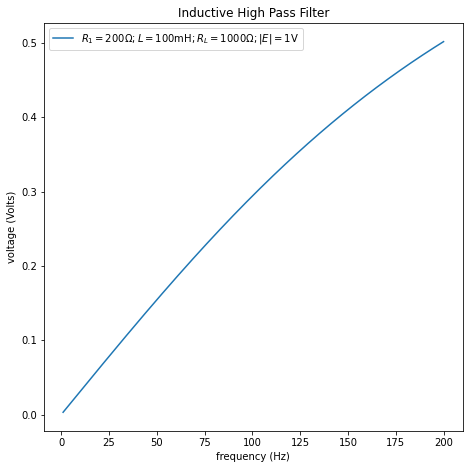

In [18]:
L_1 = Inductor(0.1)
hp_filter = InductiveHighPass(inductor=L_1, R_1=200, R_L=1000, magE=1)

f = np.linspace(1, 200, num=200)
Y = hp_filter.magV_RL(f)

fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.set(title='Inductive High Pass Filter', xlabel='frequency (Hz)', ylabel='voltage (Volts)')
ax.plot(f, Y, label=r'$R_1=200\Omega ;  L=100$' + 'mH' + r'$; R_L=1000\Omega; |E|=1$' + 'V')
ax.legend()

# Band Pass Filters

Band pass filters combine the properties of both high and low pass filters to filter out signals with frequencies that are too high and signals with frequencies that are too low, leaving only a band or range of frequencies that are allowed relatively easy passage.

## Capacitive Band Pass Filters

A capacitive band pass filter consists of a capacitive high pass and low pass filter.